In [1]:
import torch

# 1. Basics

In [2]:
torch.empty(2,3)

tensor([[9.2755e-39, 1.0286e-38, 1.0653e-38],
        [2.9389e-39, 1.0286e-38, 9.0919e-39]])

In [3]:
s=torch.tensor(7)

In [4]:
s.ndim

0

In [5]:
s.item()

7

In [6]:
v=torch.tensor([2,2])
v

tensor([2, 2])

In [7]:
v.ndim

1

In [8]:
v.shape

torch.Size([2])

In [9]:
m= torch.tensor([
    [7,8],
    [9,10]
])

In [10]:
m.ndim

2

In [11]:
m.shape

torch.Size([2, 2])

In [12]:
m[0]

tensor([7, 8])

In [13]:
m[1]

tensor([ 9, 10])

In [14]:
t= torch.tensor([
    [7,8],
    [9,10]
])

In [15]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [16]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [17]:
torch.randn(3,3)

tensor([[-1.2678, -0.0035, -1.5591],
        [-0.7959, -0.3424,  0.1654],
        [-1.8895,  1.2750, -0.2840]])

In [31]:
torch.randn((4,4),requires_grad=True) # It will help to calculate gradient

tensor([[-0.5332,  0.0536, -0.1276,  3.4930],
        [ 0.2690, -1.5329, -0.4842, -2.2473],
        [ 1.5599, -0.3701,  0.0544, -0.2574],
        [-0.2466,  1.4953,  0.5602,  0.0191]], requires_grad=True)

In [27]:
t=torch.arange(1.,10.)
t.shape,t

(torch.Size([9]), tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [28]:
y = t.reshape(3,3) #copy of t
y

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [29]:
x=t.view(3,3) # view make pointer of original

In [30]:
t + 2,x,y+3

(tensor([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 tensor([[ 4.,  5.,  6.],
         [ 7.,  8.,  9.],
         [10., 11., 12.]]))

In [27]:
x[0,0]=5

In [28]:
t

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [30]:
torch.stack([t,t,t,t],dim=1) #concate

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [31]:
torch.squeeze(t) # remove one dim

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [32]:
t.shape,t.squeeze().shape

(torch.Size([9]), torch.Size([9]))

In [40]:
t.unsqueeze(dim=1) #add one dim

tensor([[5.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [42]:
x=torch.randn(2,3,5)
x.shape

torch.Size([2, 3, 5])

In [43]:
x.permute(2,1,0).shape # realy helpful in images data rearange tensor

torch.Size([5, 3, 2])

#### Numpy to torch and vice versa

In [32]:
import numpy as np

In [36]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
print(a.type,type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<built-in method type of Tensor object at 0x000001C5C8BD9130> <class 'numpy.ndarray'>


In [37]:
a = np.ones(5)
b = torch.from_numpy(a) # share same memory location
c = torch.tensor(a) # pocy of a

a += 1
print(a)
print(b)
print(c)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


#### GPU Support

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(2,2,device=device)
x

tensor([[0.0247, 0.3723],
        [0.0771, 0.9302]])

# 2. Autograd
The package privides automatic diff for all operation on tensors.

In [51]:
import torch

x = torch.randn(3,requires_grad=True)
y = x + 2

print(x)
print(y)
print(y.grad_fn)

tensor([ 0.1938, -0.2363,  0.1585], requires_grad=True)
tensor([2.1938, 1.7637, 2.1585], grad_fn=<AddBackward0>)


In [52]:
z = y * y 
print(z)
z = z.mean()
print(z)

tensor([4.8130, 3.1106, 4.6590], grad_fn=<MulBackward0>)
tensor(4.1942, grad_fn=<MeanBackward0>)


In [53]:
print(x.grad)
z.backward() #dz/dx
print(x.grad)
# we need empty gradient in every epoch in back prob there will call 
# optimizer.zero_grad()

None
tensor([1.4626, 1.1758, 1.4390])


#### how to make requires_grad = true

In [54]:
a = torch.randn(2,2)
b = (a*a).sum()
print(a,b)
print(a.requires_grad)
print(b.grad_fn)

tensor([[ 0.4470,  1.1044],
        [-0.4651,  0.4090]]) tensor(1.8030)
False
None


In [56]:
a.requires_grad_(True)
b = (a*a).sum()
print(a.requires_grad)
print(b.grad_fn)

True


In [57]:
a = torch.randn(2,2,requires_grad=True)

b = a.detach() # create copy with grad = False
print(a.requires_grad)
print(b.requires_grad)

True
False


In [58]:
a = torch.randn(2,2,requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    b = a**2
    print(b.requires_grad)

True
False


In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

##### Make dataset

In [3]:
w = 0.7
b = 0.3

start=0
end =1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = w * X + b
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

In [5]:
train_split = int(0.8*len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test ,y_test = X[train_split:],y[train_split:]


In [6]:
len(X_train)

40

In [7]:
def plot_pred(train_data=X_train,train_label=y_train,
              test_data=X_test,test_label=y_test,
              prediction=None
             ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_label,c='b',label="Train Data")
    plt.scatter(test_data,test_label,c='g',label="Test data")
    if prediction is not None:
        plt.scatter(test_data,prediction,c='r',label="Predictions")
    plt.legend(prop={"size":14})

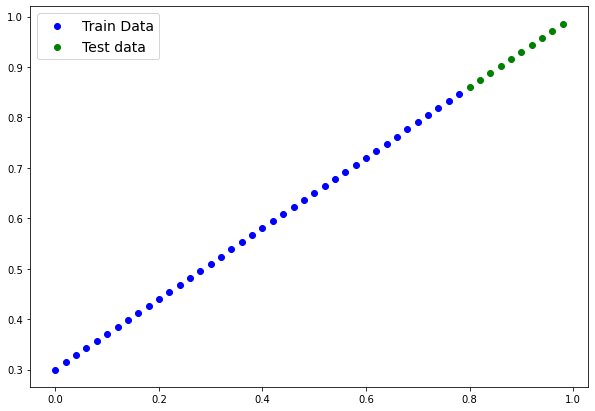

In [8]:
plot_pred()

In [9]:
w = torch.tensor(0.0,requires_grad=True)
b = torch.tensor(0.0,requires_grad=True)
w,b

(tensor(0., requires_grad=True), tensor(0., requires_grad=True))

In [10]:
def forward(x,w,b):
    return w * x + b

In [11]:
def loss(y,y_pred):
    return ((y_pred- y)**2).mean()

In [12]:
l = 0.01
n_epoch = 2000

for epoch in range(n_epoch):
    # Prediction 
    y_p = forward(X_train,w,b)
    
    #cal loss
    loss = ((y_train- y_p)**2).mean()
    # cal grad
    loss.backward()
    # update weight
    with torch.no_grad():
        w -= l * w.grad
        b -= l * b.grad
    # again set gard to zero    
    w.grad.zero_()
    b.grad.zero_()
    if (epoch+1)%100 == 0:
        print(f'eppch {epoch+1} , w = {w.item():.3f} , b = {b.item():.3f} , loss = {loss.item():.5f}')
     

eppch 100 , w = 0.229 , b = 0.436 , loss = 0.01422
eppch 200 , w = 0.287 , b = 0.464 , loss = 0.00913
eppch 300 , w = 0.324 , b = 0.453 , loss = 0.00758
eppch 400 , w = 0.358 , b = 0.440 , loss = 0.00630
eppch 500 , w = 0.388 , b = 0.428 , loss = 0.00524
eppch 600 , w = 0.415 , b = 0.416 , loss = 0.00436
eppch 700 , w = 0.440 , b = 0.406 , loss = 0.00363
eppch 800 , w = 0.463 , b = 0.397 , loss = 0.00302
eppch 900 , w = 0.484 , b = 0.388 , loss = 0.00251
eppch 1000 , w = 0.503 , b = 0.381 , loss = 0.00209
eppch 1100 , w = 0.520 , b = 0.374 , loss = 0.00174
eppch 1200 , w = 0.536 , b = 0.367 , loss = 0.00145
eppch 1300 , w = 0.550 , b = 0.361 , loss = 0.00120
eppch 1400 , w = 0.564 , b = 0.356 , loss = 0.00100
eppch 1500 , w = 0.576 , b = 0.351 , loss = 0.00083
eppch 1600 , w = 0.586 , b = 0.346 , loss = 0.00069
eppch 1700 , w = 0.596 , b = 0.342 , loss = 0.00058
eppch 1800 , w = 0.606 , b = 0.339 , loss = 0.00048
eppch 1900 , w = 0.614 , b = 0.335 , loss = 0.00040
eppch 2000 , w = 0.62

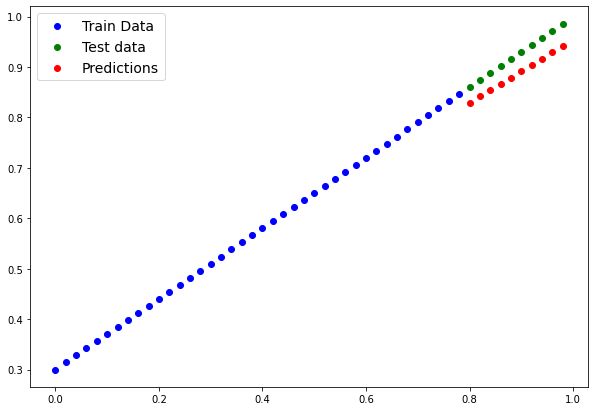

In [13]:
with torch.inference_mode(): # disable grad function make faster training
    y_pred= forward(X_test,w,b)  
y_pred 
plot_pred(prediction=y_pred)

In [14]:
class LinearReg(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.li = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.li(x)


In [15]:
samples,features = X_train.shape
input_dim,output_dim=features,features
input_dim,output_dim

(1, 1)

In [32]:
model = LinearReg(input_dim,output_dim)

In [33]:
model.state_dict()

OrderedDict([('li.weight', tensor([[0.7645]])), ('li.bias', tensor([0.8300]))])

In [34]:
with torch.inference_mode(): # disable grad function make faster training
    y_pred= model(X_test)  
y_pred    

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

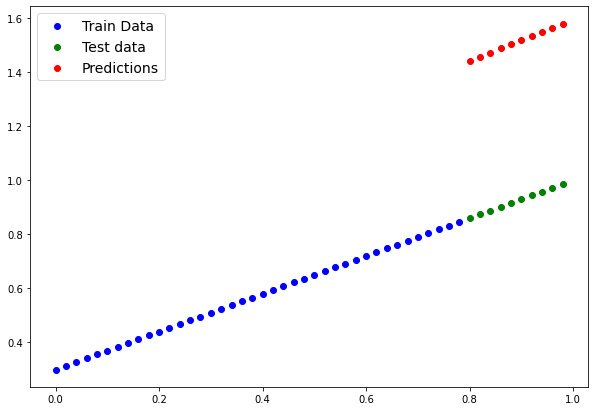

In [35]:
plot_pred(prediction=y_pred)

In [36]:
loss_fn = nn.MSELoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.01,
                         )

In [37]:
torch.manual_seed(42)
epochs=200
epoch_counts=[]
train_loss_value=[]
test_loss_value = []

for epoch in range(epochs):
    #set model to training model
    model.train()
    # forward pass
    y_pred = model(X_train)
    # calculate loss
    loss =loss_fn(y_pred,y_train)
    # Optmizer zero grad
    optimizer.zero_grad()
    # Back prop
    loss.backward()
    #Optimizer step
    optimizer.step()
    # Eval model
    model.eval()
    # Test model
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred,y_test)
    if epoch%10==0:
        epoch_counts.append(epoch)
        train_loss_value.append(loss.detach().numpy())
        test_loss_value.append(test_loss)
        print(f"loss:{loss}")
    

loss:0.3084445595741272
loss:0.19325116276741028
loss:0.12119388580322266
loss:0.0761176124215126
loss:0.04791749268770218
loss:0.030273228883743286
loss:0.01923157274723053
loss:0.012319829314947128
loss:0.007991346530616283
loss:0.005278761498630047
loss:0.003576983930543065
loss:0.0025075306184589863
loss:0.0018336859066039324
loss:0.001407369738444686
loss:0.0011359738418832421
loss:0.0009615550516173244
loss:0.0008478841627947986
loss:0.0007722926675342023
loss:0.0007206015870906413
loss:0.0006839397246949375


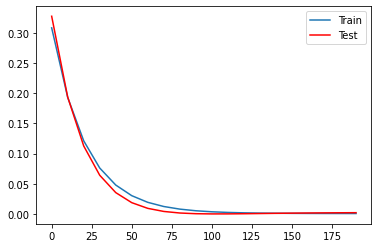

In [38]:
plt.plot(epoch_counts,train_loss_value,label="Train")
plt.plot(epoch_counts,test_loss_value,c='r',label="Test")
plt.legend()

In [39]:
print(model.state_dict())

OrderedDict([('li.weight', tensor([[0.5933]])), ('li.bias', tensor([0.3487]))])


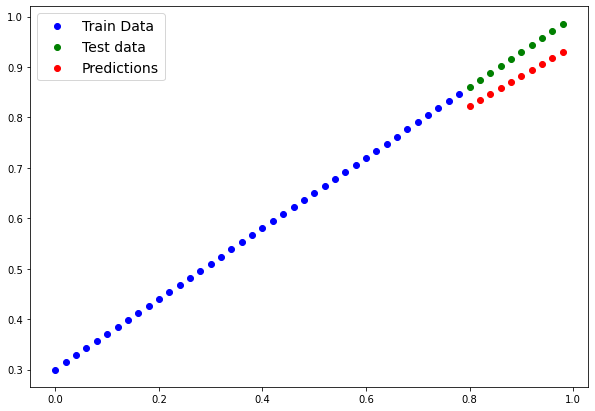

In [40]:
with torch.inference_mode(): # disable grad function make faster training
    y_pred= model(X_test)  
y_pred 
plot_pred(prediction=y_pred)

In [47]:
import torch
from torch import nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [125]:
class MyDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        sample = self.data.iloc[idx, :]
        x = torch.tensor(sample[1:].values, dtype=torch.float32)
        y = torch.tensor(sample[0], dtype=torch.long)
        return x, y


In [126]:
dataset = MyDataset('E:/DS/Datasets/mnist_train.csv')
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

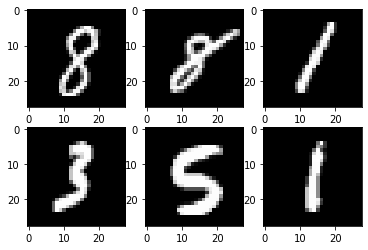

In [127]:
examples = iter(train_loader)
e_data,e_target = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(e_data[i].reshape(28,28),cmap='gray')
plt.show()    


In [129]:
class ANN(nn.Module):
    def __init__(self,input_dim,hidden_size,num_classes):
        super(ANN,self).__init__()
        self.l1 = nn.Linear(input_dim,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
        
       
    def forward(self,X):
        out = self.l1(X)
        out = self.relu(out)
        out = self.l2(out)
    
        return out

In [130]:
input_dim = 784
num_classes  = 10
hidden_size = 16
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [132]:
model = ANN(input_dim,hidden_size,num_classes).to(device)
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

ANN(
  (l1): Linear(in_features=784, out_features=16, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=16, out_features=10, bias=True)
)


In [133]:
total = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels)  in enumerate(train_loader):
        # load data to device
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
           
        #forward pass
        outputs = model(images)
        loss = loss_fn(outputs,labels)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (i+1)%100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}],Step [{i+1}/{total}] Loss:{loss.item():.4f}')

Epoch [1/10],Step [100/600] Loss:1.5809
Epoch [1/10],Step [200/600] Loss:1.2079
Epoch [1/10],Step [300/600] Loss:0.8931
Epoch [1/10],Step [400/600] Loss:0.8036
Epoch [1/10],Step [500/600] Loss:0.9348
Epoch [1/10],Step [600/600] Loss:0.6126
Epoch [2/10],Step [100/600] Loss:0.7006
Epoch [2/10],Step [200/600] Loss:0.8955
Epoch [2/10],Step [300/600] Loss:0.6153
Epoch [2/10],Step [400/600] Loss:0.4978
Epoch [2/10],Step [500/600] Loss:0.5680
Epoch [2/10],Step [600/600] Loss:0.6067
Epoch [3/10],Step [100/600] Loss:0.4876
Epoch [3/10],Step [200/600] Loss:0.4670
Epoch [3/10],Step [300/600] Loss:0.2975
Epoch [3/10],Step [400/600] Loss:0.4786
Epoch [3/10],Step [500/600] Loss:0.4338
Epoch [3/10],Step [600/600] Loss:0.4665
Epoch [4/10],Step [100/600] Loss:0.3105
Epoch [4/10],Step [200/600] Loss:0.2330
Epoch [4/10],Step [300/600] Loss:0.2298
Epoch [4/10],Step [400/600] Loss:0.1850
Epoch [4/10],Step [500/600] Loss:0.4157
Epoch [4/10],Step [600/600] Loss:0.3298
Epoch [5/10],Step [100/600] Loss:0.1825


In [134]:
dataset = MyDataset('E:/DS/Datasets/mnist_test.csv')
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [135]:
with torch.no_grad():
    n_correct = 0
    n_sample = len(test_loader.dataset)
    for images,label in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = label.to(device)
        
        outputs = model(images)
        
        _,predicted = torch.max(outputs,1)
        
        n_correct += (predicted == labels).sum().item()
    acc = n_correct / n_sample
    print(f'Accuracy of network on {n_sample} test images:{acc*100:.2f}')

Accuracy of network on 10000 test images:91.81


In [144]:
import itertools
a = [1,2]
b = [2,4]
for a,b in itertools.product(a,b):
    print(a,b)

1 2
1 4
2 2
2 4


In [149]:
def MinWindowSubstring(strArr):
    N = strArr[0]
    K = strArr[1]
    k_counts = dict.fromkeys(K, 0)
    for c in K:
        k_counts[c] += 1
    print(k_counts)    
    n = len(N)
    left = right = 0
    window_size = n + 1
    window = ""
    count = len(K)
    while right < n:
        if N[right] in k_counts:
            k_counts[N[right]] -= 1
            if k_counts[N[right]] >= 0:
                count -= 1
        right += 1
        while count == 0:
            if right - left < window_size:
                window_size = right - left
                window = N[left:right]
            if N[left] in k_counts:
                k_counts[N[left]] += 1
                if k_counts[N[left]] > 0:
                    count += 1
            left += 1
    return window

In [150]:
MinWindowSubstring(['aaabaaddae','aed'])

{'a': 1, 'e': 1, 'd': 1}


'dae'

In [151]:
def ArrayRotation(arr):
    n = len(arr)
    k = arr[0] % n
    rotated = arr[k:] + arr[:k]
    return "".join(str(x) for x in rotated)

In [152]:
ArrayRotation([2,3,4,1,6,10])

'4161023'